In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
!unzip iccad3_modified.zip

Streaming output truncated to the last 5000 lines.
  inflating: iccad3_modified/valiadation/test_NHS/NNHSCAD32123.png8.png  
  inflating: __MACOSX/iccad3_modified/valiadation/test_NHS/._NNHSCAD32123.png8.png  
  inflating: iccad3_modified/valiadation/test_NHS/NNHSCAD33452.png7.png  
  inflating: __MACOSX/iccad3_modified/valiadation/test_NHS/._NNHSCAD33452.png7.png  
  inflating: iccad3_modified/valiadation/test_NHS/NNHSCAD34593.png7.png  
  inflating: __MACOSX/iccad3_modified/valiadation/test_NHS/._NNHSCAD34593.png7.png  
  inflating: iccad3_modified/valiadation/test_NHS/NHSCAD3353.png4.png  
  inflating: __MACOSX/iccad3_modified/valiadation/test_NHS/._NHSCAD3353.png4.png  
  inflating: iccad3_modified/valiadation/test_NHS/NNHSCAD32299.png1.png  
  inflating: __MACOSX/iccad3_modified/valiadation/test_NHS/._NNHSCAD32299.png1.png  
  inflating: iccad3_modified/valiadation/test_NHS/NHSCAD31015.png6.png  
  inflating: __MACOSX/iccad3_modified/valiadation/test_NHS/._NHSCAD31015.png6.png  
 

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
import tensorflow as tf
import os
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)
import warnings
warnings.filterwarnings('ignore')

In [9]:
folder = 'iccad3_modified'

In [10]:
base_dir = os.path.join(os.path.dirname(folder), 'iccad3_modified')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valiadation')
# directory with our training hotspot pictures
train_hotspot_dir = os.path.join(train_dir, 'Hotspot')  

# directory with our training non-hotspot pictures
train_not_hotspot_dir = os.path.join(train_dir, 'Not_Hotspot')  

# directory with our validation hotspot pictures
validation_hotspot_dir = os.path.join(validation_dir, 'test_HS')

 # directory with our non-hotspot pictures
validation_not_hotspot_dir = os.path.join(validation_dir, 'test_NHS')

In [11]:
num_hs_tr = len(os.listdir(train_hotspot_dir))
num_nhs_tr = len(os.listdir(train_not_hotspot_dir))

num_hs_val = len(os.listdir(validation_hotspot_dir))
num_nhs_val = len(os.listdir(validation_not_hotspot_dir))

total_train = num_hs_tr + num_nhs_tr
total_val = num_hs_val + num_nhs_val

print('The dataset contains:')
print('\u2022 {:,} training images'.format(total_train))
print('\u2022 {:,} validation images'.format(total_val))

print('\nThe training set contains:')
print('\u2022 {:,} images with hotspot'.format(num_hs_tr))
print('\u2022 {:,} images without hotspot'.format(num_nhs_tr))

print('\nThe validation set contains:')
print('\u2022 {:,} images with hotspot'.format(num_hs_val))
print('\u2022 {:,} images without hotspot'.format(num_nhs_val))

The dataset contains:
• 5,554 training images
• 48,143 validation images

The training set contains:
• 910 images with hotspot
• 4,644 images without hotspot

The validation set contains:
• 1,809 images with hotspot
• 46,334 images without hotspot


Found 5552 images belonging to 2 classes.


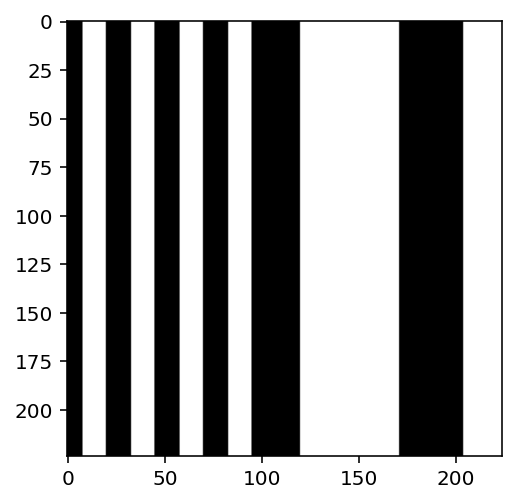

In [12]:
BATCH_SIZE = 64
IMG_SHAPE  = 224

image_gen = ImageDataGenerator(rescale=1./255)

train_data_gen = image_gen.flow_from_directory(directory=train_dir,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True,
                                          target_size=(IMG_SHAPE,IMG_SHAPE),
                                          class_mode='binary')

plt.imshow(train_data_gen[0][0][0])
plt.show()

Found 48141 images belonging to 2 classes.


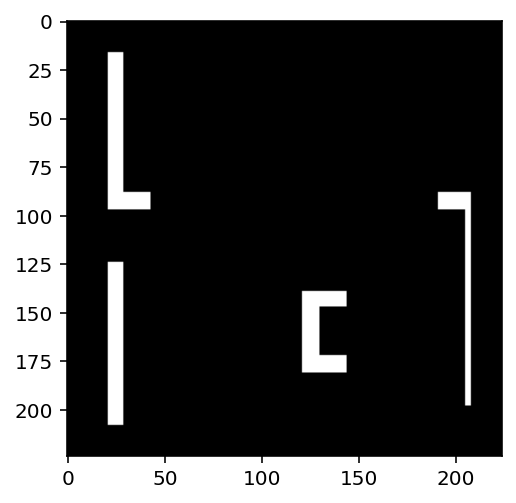

In [13]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(directory=validation_dir,
                                                 batch_size=BATCH_SIZE,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')
plt.imshow(val_data_gen[0][0][0])
plt.show()

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(12, (3, 3), activation='elu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(12, (3, 3), activation='elu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(12, (3, 3), activation='elu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 12)      336       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 12)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 12)      1308      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 12)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 12)        1308      
Total params: 2,952
Trainable params: 2,952
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 12)      336       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 12)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 12)      1308      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 12)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 12)        1308      
_________________________________________________________________
flatten (Flatten)            (None, 32448)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                2

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
history = model.fit_generator(train_data_gen,
                              epochs=5,
                              validation_data=val_data_gen)

Epoch 1/5
87/87 [==============================] - 330s 4s/step - loss: 2.5149 - accuracy: 0.8274 - val_loss: 0.6053 - val_accuracy: 0.9624
Epoch 2/5
87/87 [==============================] - 316s 4s/step - loss: 2.6389 - accuracy: 0.8363 - val_loss: 0.6053 - val_accuracy: 0.9624
Epoch 3/5
87/87 [==============================] - 300s 3s/step - loss: 2.6389 - accuracy: 0.8363 - val_loss: 0.6053 - val_accuracy: 0.9624
Epoch 4/5
87/87 [==============================] - 311s 4s/step - loss: 2.6389 - accuracy: 0.8363 - val_loss: 0.6053 - val_accuracy: 0.9624
Epoch 5/5
87/87 [==============================] - 299s 3s/step - loss: 2.6389 - accuracy: 0.8363 - val_loss: 0.6053 - val_accuracy: 0.9624


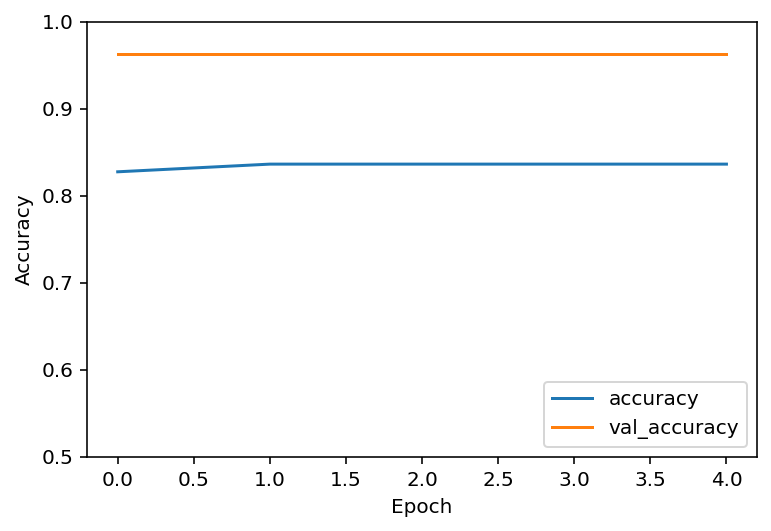

In [19]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')